# Features - explore features from the Credit Bureau

In [224]:
### only run once per environment, to set up system path to access helpers functions

import sys
import os

# Get the path to the 'src' directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))

# Add the 'src' folder to sys.path
if src_path not in sys.path:
  sys.path.append(src_path)

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from helpers import *

In [226]:
# import files

df = pd.read_csv('../data/bureau.csv')
df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [227]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1716428 non-null  int64  
 1   SK_ID_BUREAU            1716428 non-null  int64  
 2   CREDIT_ACTIVE           1716428 non-null  object 
 3   CREDIT_CURRENCY         1716428 non-null  object 
 4   DAYS_CREDIT             1716428 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1716428 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1610875 non-null  float64
 7   DAYS_ENDDATE_FACT       1082775 non-null  float64
 8   AMT_CREDIT_MAX_OVERDUE  591940 non-null   float64
 9   CNT_CREDIT_PROLONG      1716428 non-null  int64  
 10  AMT_CREDIT_SUM          1716415 non-null  float64
 11  AMT_CREDIT_SUM_DEBT     1458759 non-null  float64
 12  AMT_CREDIT_SUM_LIMIT    1124648 non-null  float64
 13  AMT_CREDIT_SUM_OVERDUE  1716428 non-null  float64
 14  CR

# EDA of each feature

1. How useful is it
2. If useful, how to impute

### 1. SK_BUREAU_ID

In [228]:
# one client can have multiple credit records
# get an idea of how many each client can have by using groupby to group by SK_ID_CURR

bureau_records_per_client = pd.DataFrame(df.groupby('SK_ID_CURR')['SK_ID_BUREAU'].count()).reset_index()
bureau_records_per_client.columns = ['SK_ID_CURR', 'num_bureau_records']
bureau_records_per_client

,SK_ID_CURR,num_bureau_records
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3
...,...,...
305806,456249,13
305807,456250,3
305808,456253,4
305809,456254,1


### New Feature #1. bureau_records_per_client

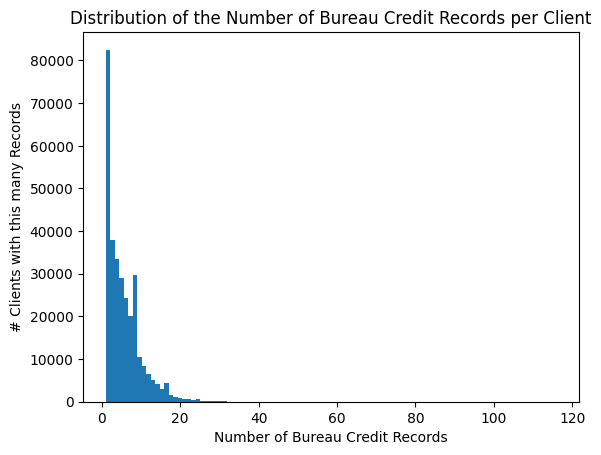

In [229]:
# check the distribution of records per client

plt.hist(bureau_records_per_client['num_bureau_records'], bins=100)
plt.title('Distribution of the Number of Bureau Credit Records per Client')
plt.xlabel('Number of Bureau Credit Records')
plt.ylabel('# Clients with this many Records');

In [230]:
# Check the number of outliers

check_outliers(bureau_records_per_client, 'num_bureau_records', iqr_multiplier=3)

The original dataframe contains 305811 observations.
Using IQR * 3, 750 outliers were detected.
If removed, 0.25% of the data will be dropped.


- While some clients have no records, others have a lot, there are a number of outliers
- Can consider including in model, but effectiveness is uncertain because:
  1. Strong skew, too many outliers
  2. Number of credit records may not indicate credit worthiness

### 2. CREDIT_ACTIVE

In [231]:
# check the values in CREDIT_ACTIVE

df['CREDIT_ACTIVE'].value_counts()

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

In [232]:
# get a count of how many active ones there are per client

bureau_num_active_credits = pd.DataFrame(df[df['CREDIT_ACTIVE']=='Active'].groupby('SK_ID_CURR')['CREDIT_ACTIVE'].count()).reset_index()
bureau_num_active_credits.columns = ['SK_ID_CURR','num_active_credits']
bureau_num_active_credits

,SK_ID_CURR,num_active_credits
0,100001,3
1,100002,2
2,100003,1
3,100005,2
4,100008,1
...,...,...
251810,456247,3
251811,456249,2
251812,456250,2
251813,456253,2


In [233]:
# count how many clients have at least 1 active credit

(bureau_num_active_credits['num_active_credits'] > 0).sum() / df.shape[0]

np.float64(0.14670874630336955)

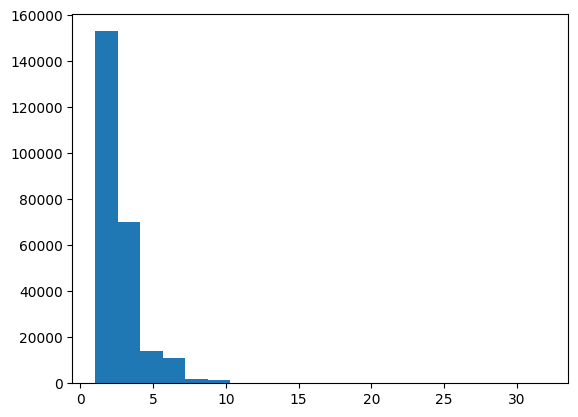

In [234]:
# plot the distribution

plt.hist(bureau_num_active_credits['num_active_credits'], bins=20);

### 3. CREDIT_CURRENCY

Recoded currency of the Credit Bureau credit

In [235]:
# check the values

df['CREDIT_CURRENCY'].value_counts() / df.shape[0]

CREDIT_CURRENCY
currency 1    0.999180
currency 2    0.000713
currency 3    0.000101
currency 4    0.000006
Name: count, dtype: float64

In [236]:
# low variability, drop feature

### 4. DAYS_CREDIT

How many days before current application did client apply for Credit Bureau credit

In [237]:
# check the values

df['DAYS_CREDIT'].value_counts()

DAYS_CREDIT
-364    1330
-336    1248
-273    1238
-357    1218
-343    1203
        ... 
-4       113
-3        74
-2        42
 0        25
-1        17
Name: count, Length: 2923, dtype: int64

In [238]:
# check for nulls

df['DAYS_CREDIT'].isna().sum()

np.int64(0)

In [239]:
# check the min and max

df['DAYS_CREDIT'].describe()

count    1.716428e+06
mean    -1.142108e+03
std      7.951649e+02
min     -2.922000e+03
25%     -1.666000e+03
50%     -9.870000e+02
75%     -4.740000e+02
max      0.000000e+00
Name: DAYS_CREDIT, dtype: float64

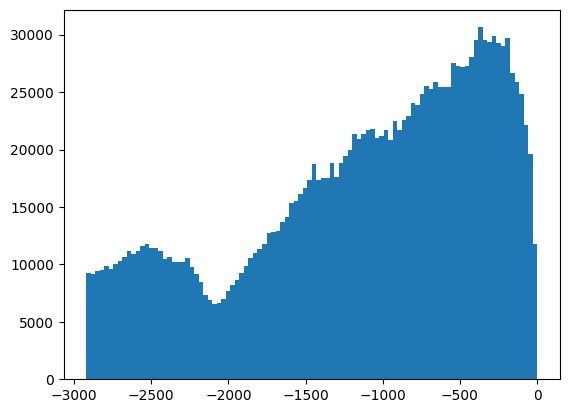

In [240]:
# check the distribution

plt.hist(df['DAYS_CREDIT'], bins=100);

- for each client, if they have multiple records, get the most recent one, get the max value of DAYS_CREDIT

In [241]:
# save grouped by results into a dataframe and rename columns

bureau_most_recent_credit_apply = pd.DataFrame(df.groupby('SK_ID_CURR')['DAYS_CREDIT'].max()).reset_index()
bureau_most_recent_credit_apply.columns = ['SK_ID_CURR','most_recent_bureau_apply']
bureau_most_recent_credit_apply

,SK_ID_CURR,most_recent_bureau_apply
0,100001,-49
1,100002,-103
2,100003,-606
3,100004,-408
4,100005,-62
...,...,...
305806,456249,-483
305807,456250,-760
305808,456253,-713
305809,456254,-1104


### 5. CREDIT_DAY_OVERDUE

Number of days past due on CB credit at the time of application for related loan in our sample

In [246]:
# check the values

df['CREDIT_DAY_OVERDUE'].value_counts()

CREDIT_DAY_OVERDUE
0       1712211
30          311
60          126
8           103
13          103
         ...   
1445          1
278           1
707           1
2193          1
1931          1
Name: count, Length: 942, dtype: int64

In [254]:
# how many had a value greater than 0

df[df['CREDIT_DAY_OVERDUE'] > 0]['SK_ID_CURR'].count() / df.shape[0]

np.float64(0.0024568464275809996)

- only 0.246% of the data in bureau had a value greater than 0
- since it is the overdue date, the longer date would be more indicative of their credit worthiness

In [256]:
# save the greater of the credit day overdue

bureau_max_days_overdue = pd.DataFrame(df.groupby('SK_ID_CURR')['CREDIT_DAY_OVERDUE'].max()).reset_index()
bureau_max_days_overdue.columns = ['SK_ID_CURR','max_days_bureau_overdue']
bureau_max_days_overdue

,SK_ID_CURR,max_days_bureau_overdue
0,100001,0
1,100002,0
2,100003,0
3,100004,0
4,100005,0
...,...,...
305806,456249,0
305807,456250,0
305808,456253,0
305809,456254,0


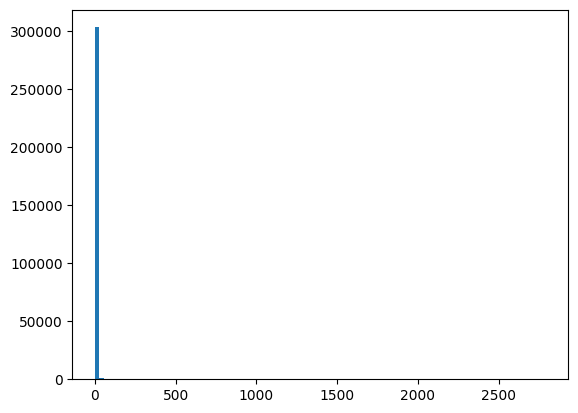

In [258]:
plt.hist(bureau_max_days_overdue['max_days_bureau_overdue'],bins=100);

### 6. DAYS_CREDIT_ENDDATE

### 13. AMT_CREDIT_SUM_OVERDUE

Current amount overdue on Credit Bureau credit

In [242]:
# check the values distribution

df['AMT_CREDIT_SUM_OVERDUE'].describe()

count    1.716428e+06
mean     3.791276e+01
std      5.937650e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.756681e+06
Name: AMT_CREDIT_SUM_OVERDUE, dtype: float64

In [243]:
# check how many are greater than 0

df[df['AMT_CREDIT_SUM_OVERDUE'] > 0].count(0) / df.shape[0]

SK_ID_CURR                0.002422
SK_ID_BUREAU              0.002422
CREDIT_ACTIVE             0.002422
CREDIT_CURRENCY           0.002422
DAYS_CREDIT               0.002422
CREDIT_DAY_OVERDUE        0.002422
DAYS_CREDIT_ENDDATE       0.002254
DAYS_ENDDATE_FACT         0.000091
AMT_CREDIT_MAX_OVERDUE    0.000436
CNT_CREDIT_PROLONG        0.002422
AMT_CREDIT_SUM            0.002422
AMT_CREDIT_SUM_DEBT       0.002142
AMT_CREDIT_SUM_LIMIT      0.001410
AMT_CREDIT_SUM_OVERDUE    0.002422
CREDIT_TYPE               0.002422
DAYS_CREDIT_UPDATE        0.002422
AMT_ANNUITY               0.000673
dtype: float64

- Only 0.24% of the dataset in Bureau had an amount greater than 0

In [244]:
# check the values grouped by client

bureau_avg_credit_overdue = pd.DataFrame(df.groupby(['SK_ID_CURR'])['AMT_CREDIT_SUM_OVERDUE'].mean()).reset_index().sort_values(by='AMT_CREDIT_SUM_OVERDUE', ascending=False)

In [245]:
bureau_avg_credit_overdue.columns = ['SK_ID_CURR','avg_credit_overdue']
bureau_avg_credit_overdue

,SK_ID_CURR,avg_credit_overdue
63684,174099,1.617404e+06
108862,226707,1.361214e+06
218992,355093,9.391702e+05
274834,420080,6.170700e+05
143311,266765,6.122374e+05
...,...,...
102570,219394,0.000000e+00
102569,219392,0.000000e+00
102568,219391,0.000000e+00
102567,219390,0.000000e+00
